<a href="https://colab.research.google.com/github/funkdub/All-GANs-Reiterations-with-their-papers/blob/master/%20Origin_GAN_Pytorch_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import torch
import torchvision.datasets as datasets
import torchvision.utils as vutils
import torchvision.transforms as transforms
import torch.nn as nn
import numpy as np
print(torch.__version__)
import matplotlib.pyplot as plt

1.1.0


In [0]:
def show_img(img,new_fig=True):
  grid = vutils.make_grid(img.detach().cpu(),nrow=8,normalize=True,pad_value=0.3)
  grid = grid.transpose(0,2).transpose(0,1)
  if new_fig:
    plt.figure()
  plt.imshow(grid.numpy())

In [55]:
class Discriminator(torch.nn.Module):
  def __init__(self,inp_dim=3*1024):
    super(Discriminator,self).__init__()
    self.fc1 = nn.Linear(inp_dim,128)
    self.nonlin1 = nn.LeakyReLU(0.2)
    self.fc2 = nn.Linear(128,1)
  def forward(self,x):
    x = x.view(x.size(0),3*1024)
    h = self.nonlin1(self.fc1(x))
    out = self.fc2(h)
    out = torch.sigmoid(out)
    return out
  
class Generator(torch.nn.Module):
  def __init__(self,z_dim=100):
    super(Generator,self).__init__()
    self.fc1 = nn.Linear(z_dim,128)
    self.nonlin1 = nn.LeakyReLU(0.2)
    self.fc2 = nn.Linear(128,1024*3)
  def forward(self,x):
    h = self.nonlin1(self.fc1(x))
    out = self.fc2(h)
    out = torch.tanh(out)
    out = out.view(out.size(0),3,32,32)
    return out

D = Discriminator()
G = Generator()
print(D)
print(G)

Discriminator(
  (fc1): Linear(in_features=3072, out_features=128, bias=True)
  (nonlin1): LeakyReLU(negative_slope=0.2)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)
Generator(
  (fc1): Linear(in_features=100, out_features=128, bias=True)
  (nonlin1): LeakyReLU(negative_slope=0.2)
  (fc2): Linear(in_features=128, out_features=3072, bias=True)
)


In [56]:
for name,p in D.named_parameters():
  print(name,p.shape)
for name,p in G.named_parameters():
  print(name,p.shape)

fc1.weight torch.Size([128, 3072])
fc1.bias torch.Size([128])
fc2.weight torch.Size([1, 128])
fc2.bias torch.Size([1])
fc1.weight torch.Size([128, 100])
fc1.bias torch.Size([128])
fc2.weight torch.Size([3072, 128])
fc2.bias torch.Size([3072])


torch.Size([2, 100])
torch.Size([2, 3, 32, 32])


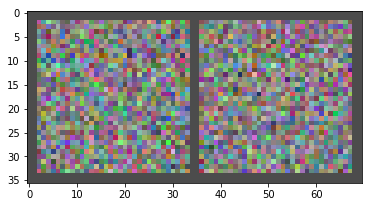

In [57]:
#测试生成器
z = torch.randn(2,100)
print(z.shape)
out = G(z)
print(out.shape)
show_img(G(z))

In [58]:
dataset = datasets.CIFAR10(root='./CIFAR10/',
                          transform=transforms.Compose([transforms.ToTensor(),
                                                        transforms.Normalize((0.5,),(0.5,))]),
                          download=True)
dataloader = torch.utils.data.DataLoader(dataset,batch_size=64,shuffle=True)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])


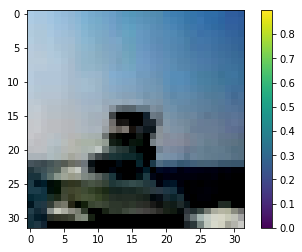

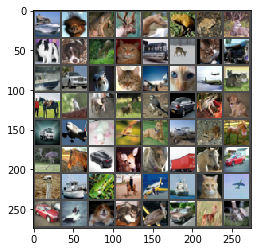

In [59]:
# test
import numpy as np
x,_ = dataset[100]
print(x.shape)
plt.imshow(np.transpose(x.numpy(),[1,2,0]))
plt.colorbar()
# dataloader and dataset
x_batch,_ = iter(dataloader).next()
x_batch.shape
#D(x_batch)
D(x_batch).shape
show_img(x_batch)

In [0]:
# define the structure
D = Discriminator()
G = Generator()

D_optimizer = torch.optim.SGD(D.parameters(),lr=0.01)
G_optimizer = torch.optim.SGD(G.parameters(),lr=0.01)

criterion = nn.BCELoss()

epoch:0,iter:0/782,last ma? D(x)=0.4790 D(G(z))=0.4810
epoch:0,iter:100/782,last ma? D(x)=0.8704 D(G(z))=0.1279
epoch:0,iter:200/782,last ma? D(x)=0.9177 D(G(z))=0.2013
epoch:0,iter:300/782,last ma? D(x)=0.8965 D(G(z))=0.3785
epoch:0,iter:400/782,last ma? D(x)=0.9250 D(G(z))=0.3418
epoch:0,iter:500/782,last ma? D(x)=0.9399 D(G(z))=0.2645
epoch:0,iter:600/782,last ma? D(x)=0.9137 D(G(z))=0.1931
epoch:0,iter:700/782,last ma? D(x)=0.9335 D(G(z))=0.1504
epoch:1,iter:0/782,last ma? D(x)=0.8736 D(G(z))=0.1282
epoch:1,iter:100/782,last ma? D(x)=0.8782 D(G(z))=0.1292
epoch:1,iter:200/782,last ma? D(x)=0.9383 D(G(z))=0.1081
epoch:1,iter:300/782,last ma? D(x)=0.9338 D(G(z))=0.0926
epoch:1,iter:400/782,last ma? D(x)=0.9282 D(G(z))=0.0760
epoch:1,iter:500/782,last ma? D(x)=0.9613 D(G(z))=0.0600
epoch:1,iter:600/782,last ma? D(x)=0.9546 D(G(z))=0.0661
epoch:1,iter:700/782,last ma? D(x)=0.9479 D(G(z))=0.0616
epoch:2,iter:0/782,last ma? D(x)=0.9690 D(G(z))=0.0449
epoch:2,iter:100/782,last ma? D(x)=0.

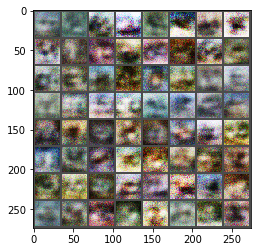

In [61]:
#train loop
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
D = Discriminator().to(device)
G = Generator().to(device)

D_optimizer = torch.optim.SGD(D.parameters(),lr=0.01)
G_optimizer = torch.optim.SGD(G.parameters(),lr=0.01)

lab_real = torch.ones(64,1,device=device)
lab_fake = torch.zeros(64,1,device=device)

collection_x_generate = []
fixed_noise = torch.randn(64,100,device=device)
fig = plt.figure()
plt.ion()

for epoch in range(20):
  for i,data in enumerate(dataloader,0):
    # train the Discriminator
    x_real,_ = iter(dataloader).next()
    x_real = x_real.to(device)
    
    D_optimizer.zero_grad()
    
    D_x = D(x_real)
    # 让判别器正确判断真实图像
    D_loss_real = criterion(D_x, lab_real)
    
    z = torch.randn(64,100,device=device)
    x_gen = G(z).detach()
    D_G_z = D(x_gen)
    # 让判别器更容易做出正确判断吗，即将生成图像判断为生成图像
    D_loss_fake = criterion(D_G_z, lab_fake)
    
    D_loss = D_loss_real + D_loss_fake
    D_loss.backward()
    D_optimizer.step()
    # train the Generator
    G_optimizer.zero_grad()
    
    z = torch.randn(64,100,device=device)
    x_gen = G(z)
    D_G_z = D(x_gen)
    # 让生成的图像 更容易被判断器判别为真实图像
    G_loss = criterion(D_G_z, lab_real)
    G_loss.backward()
    G_optimizer.step()
    
    if i%100 == 0:
      x_gen = G(fixed_noise)
      show_img(x_gen,new_fig=False)
      fig.canvas.draw()
      # D(X)判别器判断真实图像x为真是图像的概率
      # D(G(z))判别器判断生成器从噪声z生成的图像G(z)为真实图像的概率
      print('epoch:{},iter:{}/{},last ma? D(x)={:.4f} D(G(z))={:.4f}'.format(
            epoch,i,len(dataloader),D_x.mean().item(),D_G_z.mean().item()))
  x_gen = G(fixed_noise)
  collection_x_generate.append(x_gen.detach().clone())

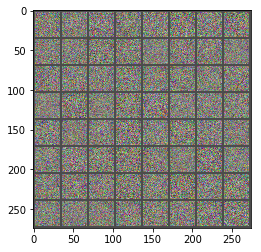

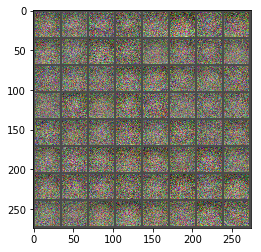

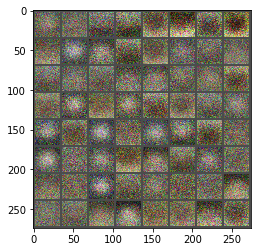

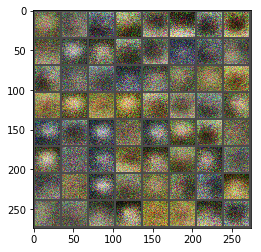

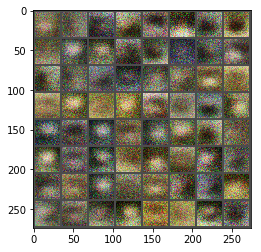

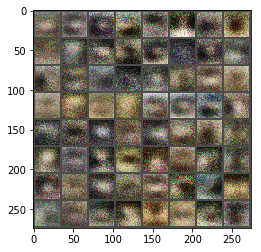

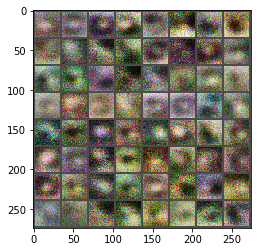

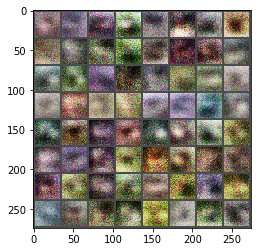

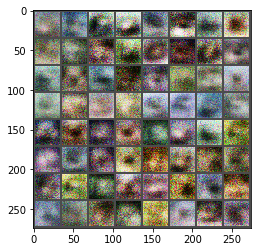

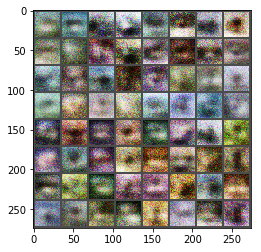

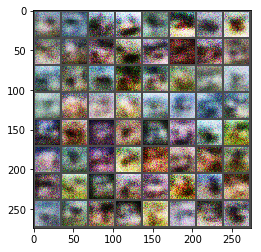

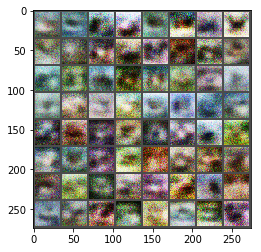

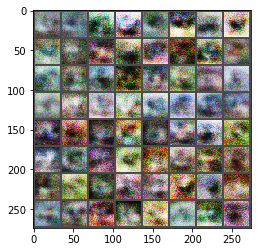

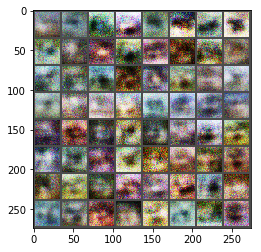

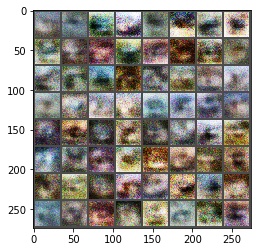

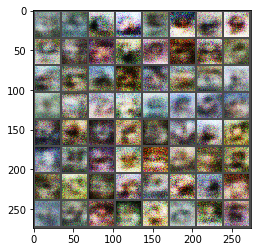

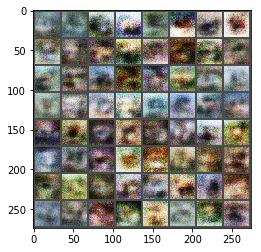

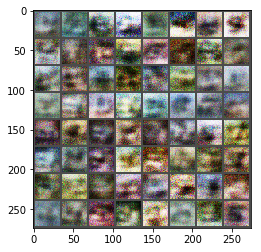

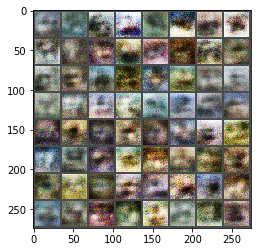

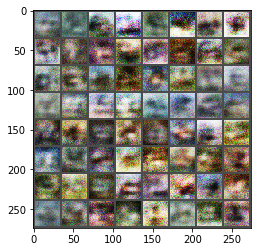

In [62]:
for x_gen in collection_x_generate:
  show_img(x_gen)

In [63]:
# Additional mission: Linear regression
x1 = torch.Tensor([1,1,1,1,1])
x2 = torch.randn(5)
x = torch.stack([x1,x2],dim=1)
y = torch.Tensor([3,3,3,3,3]).view(5,1)

net = nn.Linear(2,1,bias=False)
optimizer = torch.optim.SGD(net.parameters(),lr=0.1)

for i in range(100):
  y_p = net(x)
  loss = ((y_p - y)**2).mean()
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
print(net.weight)



Parameter containing:
tensor([[ 3.0000e+00, -7.7111e-08]], requires_grad=True)
